<a href="https://colab.research.google.com/github/Rahullnitp/Breast_cancer_basic/blob/master/breast_cancer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
from google.colab import files
uploaded=files.upload()

Saving BreastCancer_Prognostic_v1.xlsx to BreastCancer_Prognostic_v1 (2).xlsx


In [0]:
import numpy as np
import pandas as pd
from sklearn.metrics import accuracy_score

In [0]:
data=pd.read_excel("/content/BreastCancer_Prognostic_v1.xlsx")

In [0]:
data.head()

,ID,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,119513,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,8423,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,842517,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,843483,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,843584,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [0]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         198 non-null    int64  
 1   Outcome                    198 non-null    object 
 2   Time                       198 non-null    int64  
 3   radius_mean                198 non-null    float64
 4   texture_mean               198 non-null    float64
 5   perimeter_mean             198 non-null    float64
 6   area_mean                  198 non-null    float64
 7   smoothness_mean            198 non-null    float64
 8   compactness_mean           198 non-null    float64
 9   concavity_mean             198 non-null    float64
 10  concave_points_mean        198 non-null    float64
 11  symmetry_mean              198 non-null    float64
 12  fractal_dimension_mean     198 non-null    float64
 13  radius_std_dev             198 non-null    float64

In [0]:
# data[data.Lymph_Node_Status.apply(lambda x: x.isnumeric())]
data=data[data['Lymph_Node_Status'].apply(lambda x: isinstance(x, (int, np.int64)))]

In [0]:
data.drop(['ID'], axis=1, inplace=True)
# data.drop(['Lymph_Node_Status'], axis=1, inplace=True)
data.head()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [0]:
x = data.iloc[:, 1:].values
label = data.iloc[:, 0].values

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X_train =fit.fit_transform(X_train)
X_test = fit.transform(X_test)

In [0]:
from sklearn.svm import SVC
from sklearn.metrics import classification_report,confusion_matrix

In [0]:
model=SVC()
model.fit(X_train,y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [0]:
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [0]:
param_grid={'C':[0.01,0.1,1,10,100],'gamma':[1,0.1,0.01,0.001,0.0001],'kernel':['rbf']}

In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
grid=GridSearchCV(SVC(),param_grid,refit=True,verbose=4)

In [0]:
grid.fit(X_train,y_train)

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.774, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.774, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.774, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.742, total=   0.0s
[CV] C=0.01, gamma=1, kernel=rbf .....................................
[CV] ......... C=0.01, gamma=1, kernel=rbf, score=0.742, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=0.01, gamma=0.1, kernel=rbf, score=0.774, total=   0.0s
[CV] C=0.01, gamma=0.1, kernel=rbf ...................................
[CV] ....... C=

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s


[CV] ........... C=10, gamma=1, kernel=rbf, score=0.774, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.774, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.742, total=   0.0s
[CV] C=10, gamma=1, kernel=rbf .......................................
[CV] ........... C=10, gamma=1, kernel=rbf, score=0.742, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.806, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.774, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] ......... C=10, gamma=0.1, kernel=rbf, score=0.839, total=   0.0s
[CV] C=10, gamma=0.1, kernel=rbf .....................................
[CV] .

[Parallel(n_jobs=1)]: Done 125 out of 125 | elapsed:    0.3s finished


GridSearchCV(cv=None, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.01, 0.1, 1, 10, 100],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=4)

In [0]:
grid.best_params_

{'C': 100, 'gamma': 0.001, 'kernel': 'rbf'}

In [0]:
grid_predictions=grid.predict(X_test)

In [0]:
res1=confusion_matrix(y_test,grid_predictions)

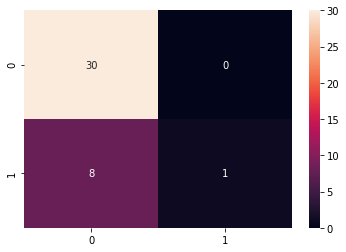

In [0]:
sns.heatmap(res1,annot=True)
plt.ioff()

In [0]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.79      1.00      0.88        30
           1       1.00      0.11      0.20         9

    accuracy                           0.79        39
   macro avg       0.89      0.56      0.54        39
weighted avg       0.84      0.79      0.72        39



##Neural Network

In [0]:
import keras
from keras.layers import Dense, Dropout, Activation, BatchNormalization
from keras.layers import Input, Dense
from keras.models import Sequential
from keras.optimizers import SGD

In [0]:
model = Sequential()
model.add(Dense(256, input_dim=33))
model.add(Activation('sigmoid'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.3))
model.add(Dense(128))
model.add(Activation('relu'))
model.add(BatchNormalization())
model.add(Dropout(0.2))
model.add(Dense(128))
model.add(Activation('softmax'))
model.add(Dense(output_dim=1, init='uniform', activation='sigmoid'))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(activation="sigmoid", units=1, kernel_initializer="uniform")`
  app.launch_new_instance()


In [0]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train, epochs=200, batch_size=16, validation_data=(X_test, y_test))

Train on 155 samples, validate on 39 samples
Epoch 1/200
155/155 [==============================] - 1s 4ms/step - loss: 0.6895 - accuracy: 0.7548 - val_loss: 0.6863 - val_accuracy: 0.7692
Epoch 2/200
155/155 [==============================] - 0s 508us/step - loss: 0.6840 - accuracy: 0.7613 - val_loss: 0.6822 - val_accuracy: 0.7692
Epoch 3/200
155/155 [==============================] - 0s 420us/step - loss: 0.6789 - accuracy: 0.7613 - val_loss: 0.6779 - val_accuracy: 0.7692
Epoch 4/200
155/155 [==============================] - 0s 506us/step - loss: 0.6734 - accuracy: 0.7613 - val_loss: 0.6739 - val_accuracy: 0.7692
Epoch 5/200
155/155 [==============================] - 0s 432us/step - loss: 0.6679 - accuracy: 0.7613 - val_loss: 0.6698 - val_accuracy: 0.7692
Epoch 6/200
155/155 [==============================] - 0s 424us/step - loss: 0.6612 - accuracy: 0.7613 - val_loss: 0.6659 - val_accuracy: 0.7692
Epoch 7/200
155/155 [==============================] - 0s 500us/step - loss: 0.6551 - a

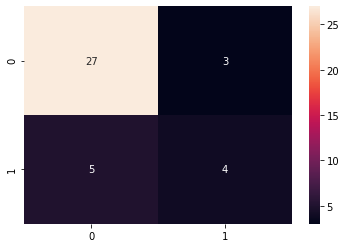

In [0]:
y_pred = model.predict(X_test)
y_pred = (y_pred > 0.5)

from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_pred)

import seaborn as sns
sns.heatmap(mat,annot=True)


In [0]:
print(accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

0.7948717948717948
              precision    recall  f1-score   support

           0       0.84      0.90      0.87        30
           1       0.57      0.44      0.50         9

    accuracy                           0.79        39
   macro avg       0.71      0.67      0.69        39
weighted avg       0.78      0.79      0.79        39



##KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [0]:
from sklearn import model_selection

In [0]:
from sklearn.metrics import accuracy_score

In [0]:
seed=8
model = KNeighborsClassifier(n_neighbors = 7)
kfold = model_selection.KFold(n_splits=10, random_state = seed)
cv_results = model_selection.cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:296: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  FutureWarning


In [0]:
cv_results.mean()

0.7887500000000001

In [0]:
cv_results.std()

0.10773955865883246

In [0]:
model.fit(X_train, y_train)
predictions = model.predict(X_test)
print(accuracy_score(y_test, predictions))
print(classification_report(y_test, predictions))

0.7692307692307693
              precision    recall  f1-score   support

           0       0.78      0.97      0.87        30
           1       0.50      0.11      0.18         9

    accuracy                           0.77        39
   macro avg       0.64      0.54      0.52        39
weighted avg       0.72      0.77      0.71        39



##Reccurence time

In [0]:
new_data=data

In [0]:
new_data.head()

,Outcome,Time,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_std_dev,texture_std_dev,perimeter_std_dev,area_std_dev,smoothness_std_dev,compactness_std_dev,concavity_std_dev,concave_points_std_dev,symmetry_std_dev,fractal_dimension_std_dev,Worst_radius,Worst_texture,Worst_perimeter,Worst_area,Worst_smoothness,Worst_compactness,Worst_concavity,Worst_concave_points,Worst_symmetry,Worst_fractal_dimension,Tumor_Size,Lymph_Node_Status
0,N,31,18.02,27.60,117.50,1013.0,0.09489,0.1036,0.1086,0.07055,0.1865,0.06333,0.6249,1.8900,3.972,71.55,0.004433,0.01421,0.03233,0.009854,0.01694,0.003495,21.63,37.08,139.70,1436.0,0.1195,0.1926,0.3140,0.1170,0.2677,0.08113,5.0,5
1,N,61,17.99,10.38,122.80,1001.0,0.11840,0.2776,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.015870,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,3.0,2
2,N,116,21.37,17.44,137.50,1373.0,0.08836,0.1189,0.1255,0.08180,0.2333,0.06010,0.5854,0.6105,3.928,82.15,0.006167,0.03449,0.03300,0.018050,0.03094,0.005039,24.90,20.98,159.10,1949.0,0.1188,0.3449,0.3414,0.2032,0.4334,0.09067,2.5,0
3,N,123,11.42,20.38,77.58,386.1,0.14250,0.2839,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.018670,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,2.0,0
4,R,27,20.29,14.34,135.10,1297.0,0.10030,0.1328,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.018850,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,3.5,0


In [0]:
label = new_data.iloc[:, 1].values
new_data.drop(['Time'], axis=1, inplace=True)

In [0]:
from sklearn.preprocessing import LabelEncoder
labelencode = LabelEncoder()
new_data['Outcome'] = labelencode.fit_transform(new_data['Outcome'])

In [0]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(new_data, label, test_size = 0.2, random_state = 0)

In [0]:
from sklearn.preprocessing import StandardScaler
fit=StandardScaler()
X_train =fit.fit_transform(X_train)
X_test = fit.transform(X_test)

In [0]:
from sklearn.tree import DecisionTreeRegressor  
regressor = DecisionTreeRegressor(random_state = 0)  
regressor.fit(X_train, y_train) 

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=0, splitter='best')

In [0]:
predictions_dct = regressor.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions_dct)

1690.871794871795

In [0]:
param_grid = {"criterion": ["mse", "mae"],
              "min_samples_split": [2,3,4,6,8,10],
              "max_depth": [2,4, 6, 8,10],
              "min_samples_leaf": [2,5,10,20],
              "max_leaf_nodes": [2,3,5,10, 20, 100],
              }

## Comment in order to publish in kaggle.

grid_cv_dtm = GridSearchCV(regressor, param_grid, cv=10)

grid_cv_dtm.fit(X_train, y_train) 

GridSearchCV(cv=10, error_score=nan,
             estimator=DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse',
                                             max_depth=None, max_features=None,
                                             max_leaf_nodes=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             presort='deprecated',
                                             random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['mse', 'mae'],
                         'max_depth': [2, 4, 6, 8, 10],
                         'max_leaf_nodes': [2, 3, 5, 10, 20, 100],
                         

In [0]:
print("R-Squared::{}".format(grid_cv_dtm.best_score_))
print("Best Hyperparameters::\n{}".format(grid_cv_dtm.best_params_))

R-Squared::0.04103943051525388
Best Hyperparameters::
{'criterion': 'mae', 'max_depth': 2, 'max_leaf_nodes': 2, 'min_samples_leaf': 2, 'min_samples_split': 2}


In [0]:
predictions_dct1=grid_cv_dtm.predict(X_test)

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_test, predictions_dct1)

1332.320512820513

##XGBOOST

In [0]:
import  xgboost

In [0]:
model = xgboost.XGBRegressor(colsample_bytree=0.4, gamma=0,  learning_rate=0.07, max_depth=3,min_child_weight=1.5,n_estimators=10000,  reg_alpha=0.75,  reg_lambda=0.45,subsample=0.6, seed=42) 

In [0]:
model.fit(X_train,y_train)

[21:18:36] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.07, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=10000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [0]:
predict_xgb=model.predict(X_test)

In [0]:
mean_squared_error(y_test, predict_xgb)

1167.3218564060699

In [0]:
xgb1 = xgboost.XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [0.001,0.01,0.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [2,4,6],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1, parameters, cv = 10, n_jobs = 5,  verbose=True)

In [0]:
xgb_grid.fit(X_train, y_train)


Fitting 10 folds for each of 45 candidates, totalling 450 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done  40 tasks      | elapsed:   23.8s
[Parallel(n_jobs=5)]: Done 190 tasks      | elapsed:  1.9min
[Parallel(n_jobs=5)]: Done 440 tasks      | elapsed:  4.3min
[Parallel(n_jobs=5)]: Done 450 out of 450 | elapsed:  4.4min finished


GridSearchCV(cv=10, error_score=nan,
             estimator=XGBRegressor(base_score=0.5, booster='gbtree',
                                    colsample_bylevel=1, colsample_bynode=1,
                                    colsample_bytree=1, gamma=0,
                                    importance_type='gain', learning_rate=0.1,
                                    max_delta_step=0, max_depth=3,
                                    min_child_weight=1, missing=None,
                                    n_estimators=100, n_jobs=1, nthread=None,
                                    objective='reg:linear', random_state=0,
                                    reg_alpha=0, reg...
                                    subsample=1, verbosity=1),
             iid='deprecated', n_jobs=5,
             param_grid={'colsample_bytree': [0.7],
                         'learning_rate': [0.001, 0.01, 0.03, 0.05, 0.07],
                         'max_depth': [5, 6, 7], 'min_child_weight': [2, 4, 6],
              

In [0]:
print(xgb_grid.best_score_)
print(xgb_grid.best_params_)

-0.05916890428772834
{'colsample_bytree': 0.7, 'learning_rate': 0.01, 'max_depth': 5, 'min_child_weight': 6, 'n_estimators': 500, 'nthread': 4, 'objective': 'reg:linear', 'silent': 1, 'subsample': 0.7}


In [0]:
predict_xgb1=xgb_grid.predict(X_test)

In [0]:
mean_squared_error(y_test, predict_xgb1)

880.8159769528589